In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#load pickle of us politicians and 
POLITICIANS_PICKLE_PATH = "../data/binary/us-politicians.pickle"
df = pd.read_pickle(POLITICIANS_PICKLE_PATH)
df.loc[df['party'] == 29552, 'party'] = 1
df.loc[df['party'] == 29468, 'party'] = 0
df.head()

,speaker_id,quote_id,quotation,speaker,party
0,1282411,2015-06-11-000090,25-year cost estimate for the U.S. nuclear mod...,Ed Markey,1
1,1282411,2015-08-11-090504,The state is transitioning to a higher percent...,Ed Markey,1
2,1282411,2015-10-27-125840,This highly coveted TIGER grant funding would ...,Ed Markey,1
3,1282411,2015-01-19-008025,carefully cutting the Gordian knot that has ti...,Ed Markey,1
4,1282411,2015-12-09-094134,The amendments would improve the safety of agi...,Ed Markey,1


In [21]:
#load pickle of labels
LABELS_CSV_PATH = "../data/binary/manifesto_data/join_result.csv"
labels = pd.read_csv(LABELS_CSV_PATH)
labels = labels.drop(labels[labels['label'] == 0].index)
labels.head()

,sentence,label
1,We were in the midst of the greatest economic ...,408
2,the previous administration had put two wars o...,305
3,and the American Dream had slipped out of reac...,601
4,"Today, our economy is growing again,",408
5,"al-Qaeda is weaker than at any point since 9/11,",104


<function matplotlib.pyplot.show(close=None, block=None)>

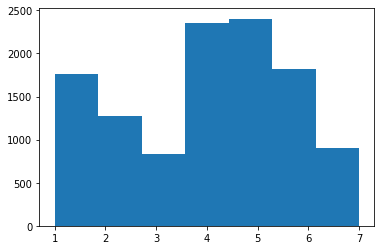

In [22]:
# Division by topic:
# 1: External Relations
# 2: Freedom and Democracy
# 3: Political System
# 4: Economy
# 5: Fabric of Society
# 6: Social Groups
topics = labels.copy()

for i in range(1, 8):
    topics.loc[ topics['label']//100 == i , 'label'] = i 

plt.hist(topics['label'], bins = 7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

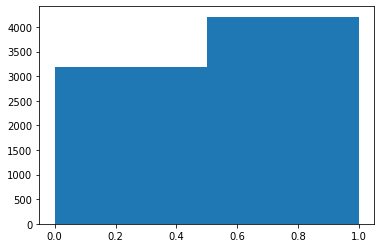

In [29]:
# Division by left/right:
# 0. Left
# 1. Right
labelLeftRight = {
    'right': [104,201,203,305,401,402,407,414,505,601,603,605,606],
    'left': [103,105,106,107,403,404,406,412,413,504,506,701,202]
    }
leftRight = labels.copy()
leftRight.loc[ leftRight['label'].isin(labelLeftRight['right']), 'label'] = 1
leftRight.loc[ leftRight['label'].isin(labelLeftRight['left']), 'label'] = 0
leftRight = leftRight.drop(leftRight[(leftRight['label'] != 0) & (leftRight['label'] != 1)].index)

plt.hist(leftRight['label'], bins = 2)
plt.show